In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras.preprocessing import image_dataset_from_directory
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
import os
import PIL

In [2]:
import pathlib
data_dir = pathlib.Path(r'C:\Users\gaura\Desktop\ML\Practice\New folder\fruits-360\training')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

67692


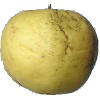

In [4]:
Apple_Golden_1 = list(data_dir.glob('Apple Golden 1/*'))
PIL.Image.open(str(Apple_Golden_1[0]))

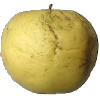

In [5]:
PIL.Image.open(str(Apple_Golden_1[1]))

In [6]:
train = keras.preprocessing.image_dataset_from_directory('Training',
                                                        labels = 'inferred',
                                                        label_mode = 'categorical',
                                                        image_size = (100,100),
                                                        shuffle = True,
                                                        interpolation = 'nearest',
                                                        seed = 123,
                                                        batch_size = 32)

Found 67692 files belonging to 131 classes.


In [7]:
test = keras.preprocessing.image_dataset_from_directory('Test',
                                                       labels = 'inferred',
                                                       image_size = (100,100),
                                                       label_mode = 'categorical',
                                                       seed = 123,
                                                       batch_size = 32,
                                                       interpolation = 'nearest')

Found 22688 files belonging to 131 classes.


In [8]:
class_names = train.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [9]:
for image_batch, label_batch in train:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 100, 100, 3)
(32, 131)


In [10]:
# Create the model
model = keras.Sequential\
([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (100,100,3)),
    layers.Conv2D(16, kernel_size = (5,5), strides = (1,1), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Conv2D(16, kernel_size = (5,5), strides = (1,1), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Conv2D(64, kernel_size = (5,5), strides = (1,1), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Conv2D(128, kernel_size = (5,5), strides = (1,1),activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Flatten(),
    layers.Dense(1024, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(131, activation = 'softmax')
    ])

In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        25664     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=1e-3,
    patience=5,
    restore_best_weights=True
)

In [13]:
history = model.fit(train, batch_size = 32, validation_data = test, epochs = 10)

Epoch 1/10
2116/2116 [==============================] - 2138s 1s/step - loss: 0.7250 - accuracy: 0.7976 - val_loss: 0.6122 - val_accuracy: 0.8404
Epoch 2/10
2116/2116 [==============================] - 656s 310ms/step - loss: 0.1140 - accuracy: 0.9647 - val_loss: 0.3509 - val_accuracy: 0.9149
Epoch 3/10
2116/2116 [==============================] - 543s 257ms/step - loss: 0.0816 - accuracy: 0.9759 - val_loss: 0.3425 - val_accuracy: 0.9329
Epoch 4/10
2116/2116 [==============================] - 1379s 652ms/step - loss: 0.0697 - accuracy: 0.9816 - val_loss: 0.5053 - val_accuracy: 0.8798
Epoch 5/10
2116/2116 [==============================] - 838s 396ms/step - loss: 0.0595 - accuracy: 0.9837 - val_loss: 0.7132 - val_accuracy: 0.8345
Epoch 6/10
2116/2116 [==============================] - 552s 261ms/step - loss: 0.0537 - accuracy: 0.9859 - val_loss: 0.3515 - val_accuracy: 0.9336
Epoch 7/10
2116/2116 [==============================] - 552s 261ms/step - loss: 0.0488 - accuracy: 0.9876 - val_l

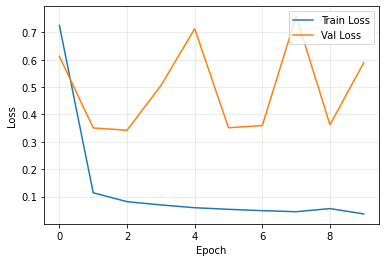

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()

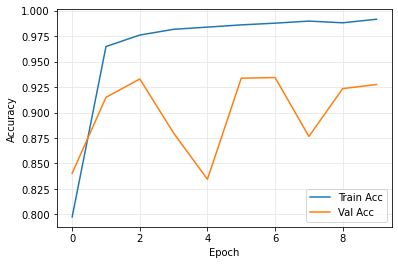

In [16]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()